## Breast Cancer

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4000 non-null   int64  
 1   BMI             4000 non-null   float64
 2   Glucose         4000 non-null   int64  
 3   Insulin         4000 non-null   float64
 4   HOMA            4000 non-null   float64
 5   Leptin          4000 non-null   float64
 6   Adiponectin     4000 non-null   float64
 7   Resistin        4000 non-null   float64
 8   MCP.1           4000 non-null   float64
 9   Classification  4000 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 312.6 KB
None


In [32]:
print(df.describe())

              Age          BMI      Glucose      Insulin         HOMA  \
count  4000.00000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     56.21075    27.422280   113.876500     8.654001     2.024332   
std      17.80965     4.413884    25.837795     6.435160     1.625638   
min      32.00000    20.690751    76.000000     2.821000     0.590033   
25%      39.00000    23.079053    76.000000     4.421750     0.970090   
50%      56.00000    27.558485   131.000000     5.818000     1.373842   
75%      72.00000    30.814916   134.000000    10.466250     2.502776   
max      85.00000    36.209606   138.000000    30.211000     8.218456   

            Leptin  Adiponectin     Resistin        MCP.1  Classification  
count  4000.000000  4000.000000  4000.000000  4000.000000     4000.000000  
mean     25.137737     9.364896    13.053667   512.183456        1.554000  
std      15.096446     4.674244     7.454424   253.279015        0.497138  
min       6.831900     3.192272     4.

## One-Sample t-Test (Glucose vs 100 mg/dL)

In [33]:
glucose = pd.to_numeric(df['Glucose'], errors='coerce').dropna()
reference_value = 100

t_stat, p_value = stats.ttest_1samp(glucose, reference_value)
print("\nOne-Sample t-test (Glucose vs 100 mg/dL):")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


One-Sample t-test (Glucose vs 100 mg/dL):
T-statistic: 33.9668, P-value: 0.0000


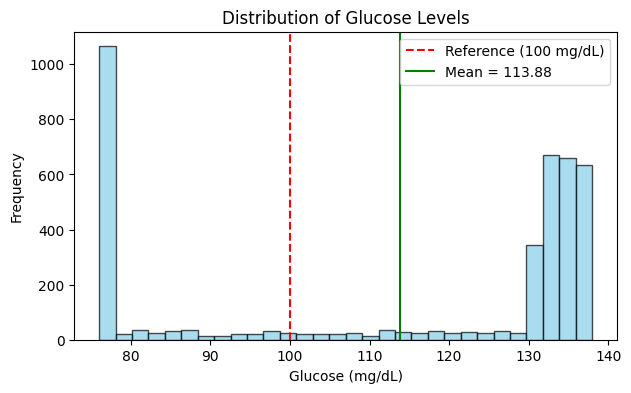

In [34]:
plt.figure(figsize=(7,4))
plt.hist(df['Glucose'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=100, color='red', linestyle='--', label='Reference (100 mg/dL)')
plt.axvline(x=df['Glucose'].mean(), color='green', linestyle='-', label=f'Mean = {df["Glucose"].mean():.2f}')
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose (mg/dL)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Two-Sample t-test Cancer (2) vs Healthy (1)

In [35]:
bmi_healthy = pd.to_numeric(df[df['Classification'] == 1]['BMI'], errors='coerce').dropna()
bmi_cancer = pd.to_numeric(df[df['Classification'] == 2]['BMI'], errors='coerce').dropna()

t_stat2, p_value2 = stats.ttest_ind(bmi_cancer, bmi_healthy, equal_var=False)
print("\nTwo-Sample t-test (BMI: Cancer vs Healthy):")
print(f"T-statistic: {t_stat2:.4f}, P-value: {p_value2:.4f}")


Two-Sample t-test (BMI: Cancer vs Healthy):
T-statistic: -0.5900, P-value: 0.5552


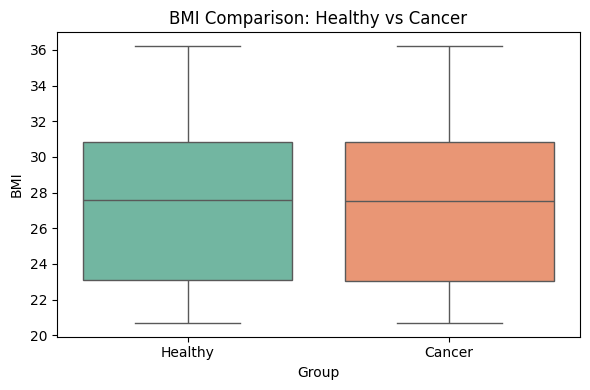

In [ ]:
df['Group'] = df['Classification'].map({1: 'Healthy', 2: 'Cancer'})

df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df_plot = df.dropna(subset=['Group', 'BMI'])

plt.figure(figsize=(6,4))
sns.boxplot(
    x='Group',
    y='BMI',
    data=df_plot,
    hue='Group',                 
    palette={'Healthy':'#66c2a5','Cancer':'#fc8d62'},
    legend=False                 
)
plt.title("BMI Comparison: Healthy vs Cancer")
plt.xlabel("Group")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

## Anova

In [39]:
if 'AgeGroup' not in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 40, 60, 80], labels=['20-40', '41-60', '61-80'])
# Convert Insulin to numeric
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce')

# Perform ANOVA
model = ols('Insulin ~ C(AgeGroup)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA (Insulin ~ AgeGroup):")
print(anova_table)


One-Way ANOVA (Insulin ~ AgeGroup):
                    sum_sq      df        F    PR(>F)
C(AgeGroup)      29.177422     2.0  0.35431  0.701683
Residual     141889.125776  3446.0      NaN       NaN


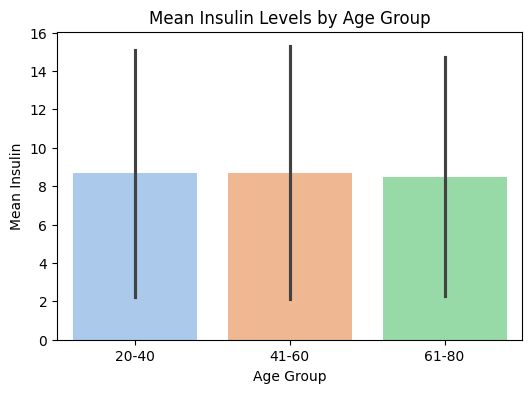

In [41]:
df_plot = df.dropna(subset=['AgeGroup', 'Insulin'])

plt.figure(figsize=(6, 4))
sns.barplot(
    x='AgeGroup',
    y='Insulin',
    hue='AgeGroup',      # set hue same as x to avoid palette warning
    data=df_plot,
    errorbar='sd',       # modern replacement for ci='sd'
    palette='pastel',
    legend=False         # we don't need a separate legend since x already shows groups
)
plt.title("Mean Insulin Levels by Age Group")
plt.ylabel("Mean Insulin")
plt.xlabel("Age Group")
plt.show()